# Homework Assignment #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [307]:
"""Fundamental things that I found myself still don't get:1.bar plot--height  2.remove filtered rows 3. convert to float"""

"Fundamental things that I found myself still don't get:1.bar plot--height  2.remove filtered rows 3. convert to float"

## Section 1: Police Killings

In [3]:
killings = pd.read_csv('../ga-ds-jenny/police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- Rename "lawenforcementagency" to "agency"
- Rename "raceethnicity" to "race"

In [79]:
killings.rename(columns={"lawenforcementagency":"agency","raceethnicity":"race"}, inplace=True) 

### 2. Show the count of missing values in each column

In [8]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 14 columns):
name                    467 non-null object
age                     467 non-null int64
gender                  467 non-null object
raceethnicity           467 non-null object
month                   467 non-null object
day                     467 non-null int64
year                    467 non-null int64
streetaddress           463 non-null object
city                    467 non-null object
state                   467 non-null object
lawenforcementagency    467 non-null object
cause                   467 non-null object
armed                   467 non-null object
county_income           467 non-null int64
dtypes: int64(4), object(10)
memory usage: 54.7+ KB


### 3. Replace each null/missing value in the dataframe with the string "unknown"

In [10]:
killings.fillna('unknown', inplace=True)
killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 14 columns):
name                    467 non-null object
age                     467 non-null int64
gender                  467 non-null object
raceethnicity           467 non-null object
month                   467 non-null object
day                     467 non-null int64
year                    467 non-null int64
streetaddress           467 non-null object
city                    467 non-null object
state                   467 non-null object
lawenforcementagency    467 non-null object
cause                   467 non-null object
armed                   467 non-null object
county_income           467 non-null int64
dtypes: int64(4), object(10)
memory usage: 54.7+ KB


### 4. How many killings were there in March and April?

In [27]:
MAkillings = (killings.month == 'March') | (killings.month == 'April')
MAkillings.sum()

210

### 5. How many male and how many female victims are there?

In [31]:
Number_male=(killings.gender == 'Male').sum()
Number_male

445

In [33]:
Number_female=(killings.gender == 'Female').sum()
Number_female
"""Question: Why .count does not work here? .count shows the total number"""

22

### 6. How many killings were of unarmed people?

In [100]:
killings['Number_unarmed']=(killings.armed == 'No').sum()
Number_unarmed

102

### 7. What percentage of all killings were unarmed?

In [108]:
Percent= float(Number_unarmed)/killings.name.count()
Percent

0.21841541755888652

### 8. What are the 5 states with the most killings?

In [82]:
state =  killings.state
state.value_counts().head()


CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [81]:
race = killings.race
race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

(array([  58.,   98.,  114.,   76.,   51.,   36.,   21.,    7.,    4.,    2.]),
 array([ 16. ,  23.1,  30.2,  37.3,  44.4,  51.5,  58.6,  65.7,  72.8,
         79.9,  87. ]),
 <a list of 10 Patch objects>)

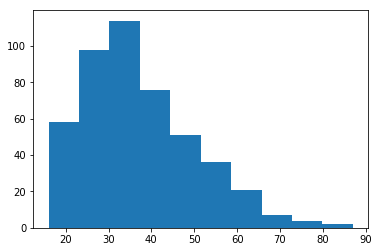

In [95]:
plt.hist(killings.age)

### 11. Show histogram of ages for each race

(array([ 3.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([   4. ,   27.2,   50.4,   73.6,   96.8,  120. ,  143.2,  166.4,
         189.6,  212.8,  236. ]),
 <a list of 10 Patch objects>)

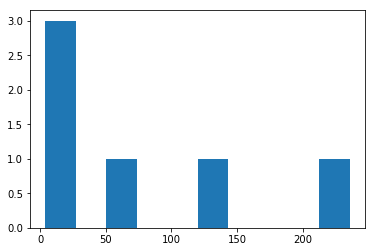

In [115]:
race_age=killings.groupby('race').age.count()
plt.hist(race_age)


"""
kills.hist(column='age', by='race')

"""

### 12. What is the average age of death by race?

In [124]:
avg_age=killings.groupby(race).age.mean()
avg_age

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

ValueError: incompatible sizes: argument 'height' must be length 6 or scalar

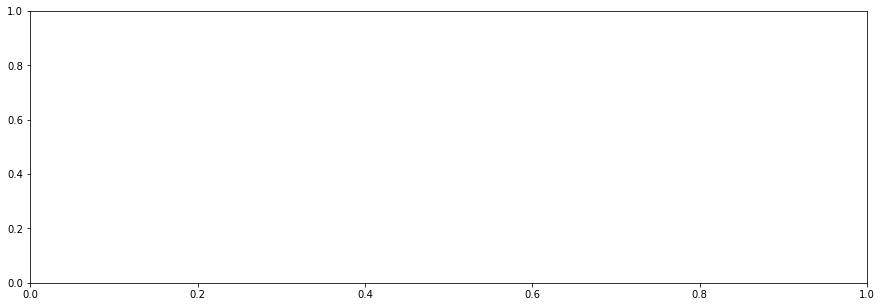

In [155]:
month_death=killings.groupby('month').name.count()
pos=np.arange(month_death.size)
plt.figure(figsize=(15,5))
plt.bar(left=pos, height=month, tick_lable=month.index, align="center")

"""
months=('January‘：1，’‘)
killings['month_number']=killings['month'].map(months) 
killings.groupby(['month','month_number])['name'].count().sort_index(level=1).reset_index(level1=1, drop=True)
plot(kind='bar') """

## Section 2: College Majors

In [179]:
majors = pd.read_csv('../ga-ds-jenny/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [180]:
majors.drop(labels='Major_code', axis=1, inplace=True)
majors.drop(labels='Employed_full_time_year_round', axis=1, inplace=True)
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [183]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 9 columns):
Major                173 non-null object
Major_category       173 non-null object
Total                173 non-null int64
Employed             173 non-null int64
Unemployed           173 non-null int64
Unemployment_rate    173 non-null float64
Median               173 non-null int64
P25th                173 non-null int64
P75th                173 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 13.5+ KB


### 3. What are the top 10 highest paying majors?

In [186]:
highest=majors.sort_values('Median', ascending=False).head(10)
highest

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
59,PETROLEUM ENGINEERING,Engineering,19631,14002,617,0.042205,125000,75000,210000.0
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,4414,0.034358,106000,78000,125000.0
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,449,0.040309,97000,60000,125000.0
55,METALLURGICAL ENGINEERING,Engineering,12818,6939,326,0.044873,96000,65000,123000.0
58,NUCLEAR ENGINEERING,Engineering,9826,7320,527,0.067159,95000,65000,128000.0
56,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,366,0.047032,92000,52000,124000.0
97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,150,0.024900,92000,53000,136000.0
48,ELECTRICAL ENGINEERING,Engineering,671647,489965,26064,0.050509,88000,60000,116000.0
45,CHEMICAL ENGINEERING,Engineering,188046,131697,6388,0.046261,86000,60000,120000.0
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,0,0.000000,85000,55000,125000.0


### 4. Plot the data from the last question in a bar chart, include proper title, and labels


In [190]:
pos=np.arange(majors.Median.size)
plt.bar(left=pos, height=majors.Major_category, tick_lable=Major_category.index, align="center")
"""cannot get the heigh again..."""

NameError: name 'Major_category' is not defined

### 5. What is the average median salary for each major category?

In [205]:
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

### 6. Visualize only the top 5 paying major categories

In [206]:
top5=majors.sort_values('Median', ascending=False).head()
top5
Median=majors.Median
pos=np.arange(Median.size)
plt.bar(left=pos, height=Major_category, tick_lable=Major_category.index, align="center")

"""Still cannot get the Height"""

NameError: name 'Major_category' is not defined

### 7. Plot a histogram of the distribution of median salaries

(array([ 25.,  61.,  32.,  31.,  10.,   7.,   5.,   1.,   0.,   1.]),
 array([  35000.,   44000.,   53000.,   62000.,   71000.,   80000.,
          89000.,   98000.,  107000.,  116000.,  125000.]),
 <a list of 10 Patch objects>)

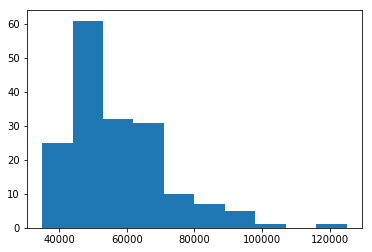

In [202]:
plt.hist(Median)

### 8. Plot a histogram of the distribution of median salaries by major category

ValueError: cannot set an array element with a sequence

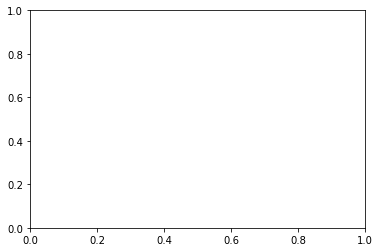

In [212]:
majorcategory_median=majors.groupby('Major_category').Median
plt.hist(majorcategory_median)

### 9. What are the top 10 most UNemployed majors?

In [214]:
UNemployed=majors.sort_values('Unemployed', ascending=False).head(10)
UNemployed

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
161,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,147261,0.058865,58000,39500,86000.0
158,GENERAL BUSINESS,Business,2148712,1580978,85626,0.051378,60000,40000,95000.0
114,PSYCHOLOGY,Psychology & Social Work,1484075,1055854,79066,0.069667,45000,31000,68000.0
159,ACCOUNTING,Business,1779219,1335825,75379,0.053415,65000,42500,100000.0
13,COMMUNICATIONS,Communications & Journalism,987676,790696,54390,0.064360,50000,35000,80000.0
73,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,1098647,708882,52248,0.068645,50000,32900,75000.0
164,MARKETING AND MARKETING RESEARCH,Business,1114624,890125,51839,0.055033,56000,38500,90000.0
132,POLITICAL SCIENCE AND GOVERNMENT,Social Science,748956,541630,40376,0.069374,58000,38000,90000.0
25,GENERAL EDUCATION,Education,1438867,843693,38742,0.043904,43000,32000,59000.0
78,BIOLOGY,Biology & Life Science,839454,583079,36757,0.059301,51000,35000,80000.0


### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [222]:
Un_category=majors.groupby('Major_category').Unemployed.mean()
majors.sort_values('Un_category',ascending=False).head(10)

KeyError: 'Un_category'

## Section 3: FIFA Soccer Game data

In [262]:
fifa = pd.read_csv('../ga-ds-jenny/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [263]:
fifa.columns = map(str.lower, fifa.columns)

In [264]:
fifa.set_index('name', inplace=True)

In [265]:
fifa.drop(labels='national_position', axis=1, inplace=True)
fifa.drop(labels='national_kit', axis=1, inplace=True)
fifa.drop(labels='club_kit', axis=1, inplace=True)
fifa.drop(labels='club_joining', axis=1, inplace=True)
fifa.drop(labels='contract_expiry', axis=1, inplace=True)

In [280]:
GK=fifa.club_position == 'GK'
"""Don't know how to drop them"""


name
Cristiano Ronaldo     True
Lionel Messi          True
Neymar                True
Luis Suárez           True
Manuel Neuer          True
De Gea                True
Robert Lewandowski    True
Gareth Bale           True
Zlatan Ibrahimović    True
Thibaut Courtois      True
Jérôme Boateng        True
Eden Hazard           True
Luka Modrić           True
Mesut Özil            True
Gonzalo Higuaín       True
Thiago Silva          True
Sergio Ramos          True
Sergio Agüero         True
Paul Pogba            True
Antoine Griezmann     True
Kevin De Bruyne       True
Marco Reus            True
Alexis Sánchez        True
Toni Kroos            True
Diego Godín           True
Mats Hummels          True
Hugo Lloris           True
Giorgio Chiellini     True
Philipp Lahm          True
Pepe                  True
                      ... 
Kieran Butler         True
Kyle Egan             True
Alfie Kilgour         True
Shane Hanney          True
Louis Jones           True
Ben Kelly             T

In [266]:
fifa

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,...,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,...,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,...,86,86,84,85,88,33,27,31,25,37
Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,...,16,14,11,47,11,91,89,95,90,89
De Gea,Spain,Manchester Utd,GK,90,193 cm,82 kg,Right,11/07/1990,26,GK,...,12,21,19,40,13,86,88,87,85,90
Robert Lewandowski,Poland,FC Bayern,ST,90,185 cm,79 kg,Right,08/21/1988,28,ST,...,82,77,76,81,86,8,15,12,6,10
Gareth Bale,Wales,Real Madrid,RW,90,183 cm,74 kg,Left,07/16/1989,27,RW,...,90,86,85,76,76,5,15,11,15,6
Zlatan Ibrahimović,Sweden,Manchester Utd,ST,90,195 cm,95 kg,Right,10/03/1981,35,ST,...,88,82,82,91,93,9,13,10,15,12


In [267]:

fifa.drop(labels='gk_positioning', axis=1, inplace=True)
fifa.drop(labels='gk_diving', axis=1, inplace=True)
fifa.drop(labels='gk_kicking', axis=1, inplace=True)
fifa.drop(labels= 'gk_handling', axis=1, inplace=True)
fifa.drop(labels='gk_reflexes', axis=1, inplace=True)

In [268]:
fifa.drop(subset = fifa.rating<70, inplace=True)

"""don't know how to drop rows"""

TypeError: drop() got an unexpected keyword argument 'subset'

In [269]:
fifa['height','weight']=fifa['height','weight'].apply(pd.to_numeric)

KeyError: ('height', 'weight')

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [282]:
qualify=['speed','marking','finishing']
fifa[fifa.rating.isin(qualify)]

"don't know how to make sure the players have data in those three columns"

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,


In [285]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17588 entries, Cristiano Ronaldo to Barry Richardson
Data columns (total 42 columns):
nationality           17588 non-null object
club                  17588 non-null object
club_position         17588 non-null object
rating                17588 non-null int64
height                17588 non-null object
weight                17588 non-null object
preffered_foot        17588 non-null object
birth_date            17588 non-null object
age                   17588 non-null int64
preffered_position    17588 non-null object
work_rate             17588 non-null object
weak_foot             17588 non-null int64
skill_moves           17588 non-null int64
ball_control          17588 non-null int64
dribbling             17588 non-null int64
marking               17588 non-null int64
sliding_tackle        17588 non-null int64
standing_tackle       17588 non-null int64
aggression            17588 non-null int64
reactions             17588 non-null int64


### 3. Who is the tallest French lefted foot player?

In [300]:
fifa[fifa.preffered_foot == 'Left'].sort_values('rating', ascending=False).head(1)


,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,Argentina,FC Barcelona,GK,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85


### 4. Show a pandas series of every attribute's correlation with the rating attribute

### 5. Make a heatmap of the dataset's correlation table

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [287]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
              'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [289]:
fifa2=fifa[fifa.club.isin(clubs_list)]
fifa2

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,GK,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,FC Barcelona,GK,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,FC Barcelona,GK,92,174 cm,68 kg,Right,02/05/1992,25,LW,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,FC Barcelona,GK,92,182 cm,85 kg,Right,01/24/1987,30,ST,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,...,52,78,25,25,13,16,14,11,47,11
De Gea,Spain,Manchester Utd,GK,90,193 cm,82 kg,Right,11/07/1990,26,GK,...,57,67,21,31,13,12,21,19,40,13
Robert Lewandowski,Poland,FC Bayern,GK,90,185 cm,79 kg,Right,08/21/1988,28,ST,...,78,84,85,86,91,82,77,76,81,86
Gareth Bale,Wales,Real Madrid,GK,90,183 cm,74 kg,Left,07/16/1989,27,RW,...,77,85,86,91,87,90,86,85,76,76
Zlatan Ibrahimović,Sweden,Manchester Utd,GK,90,195 cm,95 kg,Right,10/03/1981,35,ST,...,86,72,80,93,90,88,82,82,91,93


### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

ValueError: incompatible sizes: argument 'height' must be length 1 or scalar

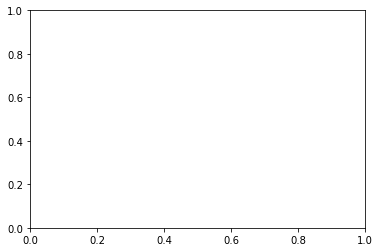

In [292]:
plt.bar(left=fifa2.long_shots.mean(), height=fifa2.club, tick_lable=fifa2.club.index, align="center")
plt.bar(left=fifa2.curve.mean(), height=fifa2.club, tick_lable=fifa2.club.index, align="center")
plt.bar(left=fifa2.dribbling.mean(), height=fifa2.club, tick_lable=fifa2.club.index, align="center")

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

In [306]:
plt.scatter(fifa.short_pass, fifa.preffered_foot)
colors = {}

ValueError: could not convert string to float: Right

ValueError: could not convert string to float: Right